<a href="https://colab.research.google.com/github/mvdantas/Data-Science/blob/master/scrapingBCB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['figure.figsize']= (16,8)

In [2]:
def consulta_bc(codigo_bcb):
 url = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
 df = pd.read_json(url)
 df['data'] = pd.to_datetime(df['data'],dayfirst = True)
 df.set_index('data', inplace=True)
 return df
#ver o cógigo. Exemplo 433 é o IPCA (bcbsgs)

In [ ]:
ipca = consulta_bc(433)

In [ ]:
igpm = consulta_bc(189)

In [ ]:
selic_meta = consulta_bc(432)

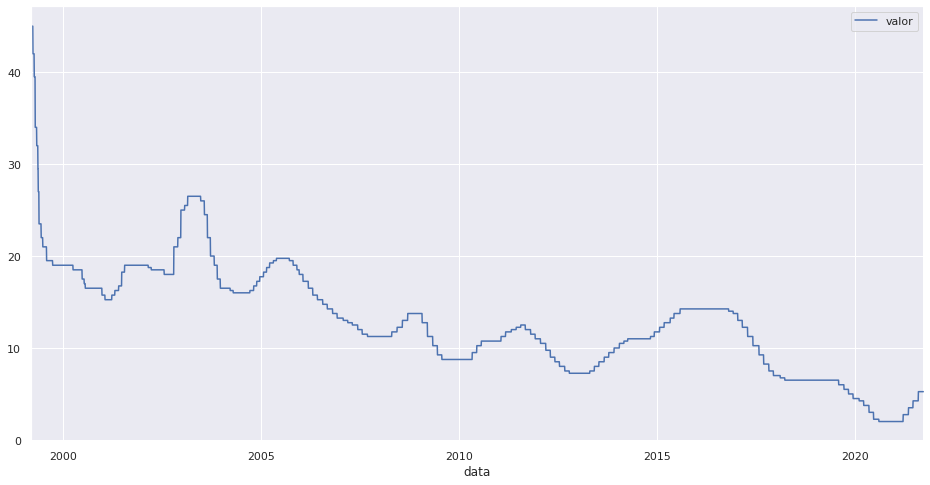

In [ ]:
selic_meta.plot()

In [ ]:
reservas_internacionais = consulta_bc(13621)

Text(0.5, 1.0, 'Reservas Internacionais')

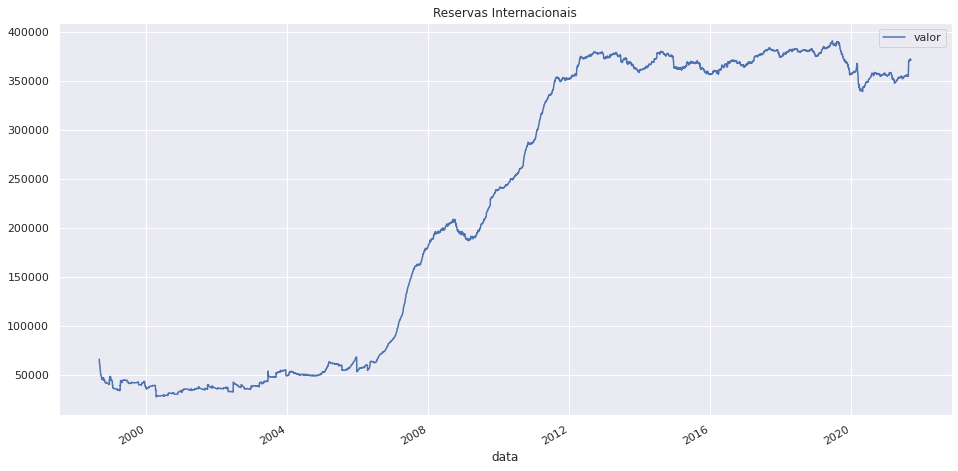

In [ ]:
reservas_internacionais.plot()
plt.title('Reservas Internacionais')

In [ ]:
pnad = consulta_bc(24369)

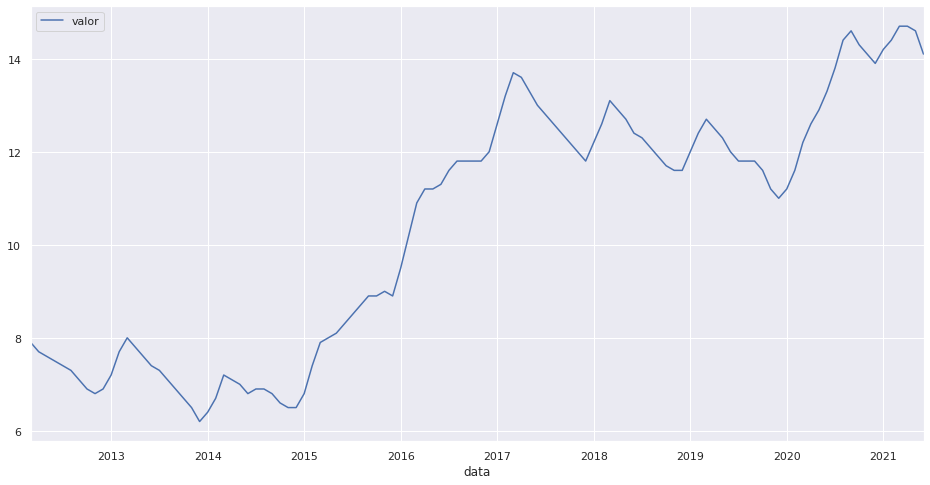

In [ ]:
pnad.plot()

In [3]:
!pip install yfinance 
import yfinance as yf

     |████████████████████████████████| 6.3 MB 6.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=1525af7c17c3ad832bb2a5f122ebfdb91428b05b64cc55aab03c9bbbd5334cbb
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
ibov = yf.download(tickers = '^BVSP')["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [5]:
ibov_retorno = ibov.pct_change()
ibov_retorno.tail()

Date
2021-09-13    0.018532
2021-09-14   -0.001916
2021-09-15   -0.009623
2021-09-16   -0.011029
2021-09-17   -0.020695
Name: Adj Close, dtype: float64

In [6]:
data_inicio = '2011-01-01'

In [7]:
retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
retorno_acumulado.iloc[0] = 1

In [8]:
retorno_acumulado

Date
2011-01-03    1.000000
2011-01-04    1.014617
2011-01-05    1.025770
2011-01-06    1.018383
2011-01-07    1.010851
                ...   
2021-09-13    1.679590
2021-09-14    1.676373
2021-09-15    1.660241
2021-09-16    1.641931
2021-09-17    1.607950
Name: Adj Close, Length: 2645, dtype: float64

In [9]:
cdi = consulta_bc(12)

In [10]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0]=1

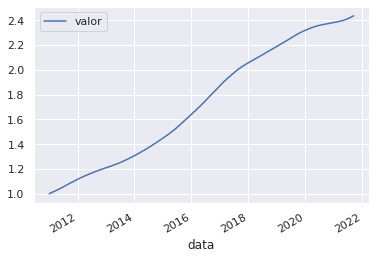

In [11]:
cdi_acumulado.plot()

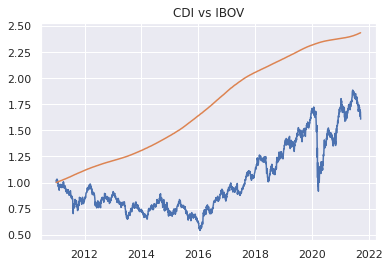

In [12]:
fig, ax = plt.subplots()
plt.title("CDI vs IBOV")
ax.plot(retorno_acumulado)
ax.plot(cdi_acumulado)